<a href="https://colab.research.google.com/github/TanveerCU/Training-ML-models/blob/main/Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/TanveerCU/Training-Data.git
import os
import cv2 as cv
!apt install unzip
!unzip "./Training-Data/data.zip"
!unzip "./Training-Data/alphabet.zip"

Cloning into 'Training-Data'...
remote: Enumerating objects: 4, done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 4
Unpacking objects: 100% (4/4), done.


# **DIGITS ONLY**

In [ ]:
train_images=[]
train_labels=[]
List = os.listdir("./data/zero")
i=1

for file in List:
  file="./data/zero/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(0)
  i+=1
print(i)


List = os.listdir("./data/one")
i=1
for file in List:
  file="./data/one/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(1)
  i+=1
print(i)



List = os.listdir("./data/two")
i=1

for file in List:
  file="./data/two/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(2)
  i+=1
print(i)



List = os.listdir("./data/three")
i=1

for file in List:
  file="./data/three/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(3)
  i+=1

print(i)
len(train_images)

List = os.listdir("./data/four")
i=1

for file in List:
  file="./data/four/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(4)

  i+=1

print(i)


List = os.listdir("./data/five")
i=1

for file in List:
  file="./data/five/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(5)

  i+=1

print(i)



List = os.listdir("./data/six")
i=1
#print(len(List))
for file in List:
  file="./data/six/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(6)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)



List = os.listdir("./data/seven")
i=1
#print(len(List))
for file in List:
  file="./data/seven/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(7)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)



List = os.listdir("./data/eight")
i=1
#print(len(List))
for file in List:
  file="./data/eight/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(8)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)



List = os.listdir("./data/nine")
i=1
#print(len(List))
for file in List:
  file="./data/nine/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(9)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)

4957
6454
6559
5977
4542
3382
3757
4129
3895
4180


In [ ]:
import numpy as np
print(len(train_images))
train_images=np.array(train_images)
train_labels=np.array(train_labels)
train_images = train_images / 255.0

47822


In [ ]:
print(train_images.shape)
print(train_labels.shape)

(47822, 32, 32)
(47822,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [ ]:
print(number_of_train)
print(number_of_test)

40648
7174


In [ ]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (40648, 1024)
X test flatten (7174, 1024)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
#model=svm.SVC(gamma=0.001,C=100)
clf=MultinomialNB()
print(clf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [ ]:
clf.fit(x_train_flatten, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
predictions = clf.predict(x_test_flatten)

In [ ]:
score = clf.score(x_test_flatten, y_test)
print(score)

0.5303875104544188


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[304 112  69 177  19  16  17  13   9   2]
 [ 14 639  51 182   3   1   8   2  82   8]
 [  1  11 549  49  15   5   4 126  95 121]
 [ 92  68  54 504  11  94  73   8   5   4]
 [  8   5  60  74 326  34  83  39  80   6]
 [ 11  39  12  67  34 221  98   5  44   0]
 [  3   1  53  60   4  19 243   6 124  19]
 [  3   2  13  35  30   8  23 441  55   1]
 [  0   0  70   6   9  32  79   8 328  22]
 [  2  57 109  34   2   3  39   9 109 250]]


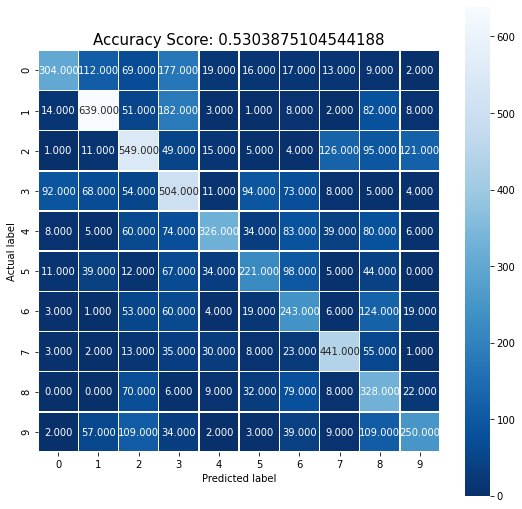

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# **CHAR ONLY**

In [ ]:
import os
import cv2 as cv

In [ ]:
train_images=[]
train_labels=[]
List = os.listdir("./alphabet/ko")
i=1

for file in List:
  file="./alphabet/ko/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(10)
  i+=1
print(i)


List = os.listdir("./alphabet/kho")
i=1
for file in List:
  file="./alphabet/kho/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(11)
  i+=1
print(i)



List = os.listdir("./alphabet/go")
i=1

for file in List:
  file="./alphabet/go/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(12)
  i+=1
print(i)



List = os.listdir("./alphabet/gho")
i=1

for file in List:
  file="./alphabet/gho/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(13)
  i+=1

print(i)
len(train_images)

List = os.listdir("./alphabet/cho")
i=1

for file in List:
  file="./alphabet/cho/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(14)

  i+=1

print(i)


List = os.listdir("./alphabet/jo")
i=1

for file in List:
  file="./alphabet/jo/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(15)

  i+=1

print(i)



List = os.listdir("./alphabet/dho")
i=1
#print(len(List))
for file in List:
  file="./alphabet/dho/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(16)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)



List = os.listdir("./alphabet/lo")
i=1
#print(len(List))
for file in List:
  file="./alphabet/lo/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(17)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)



List = os.listdir("./alphabet/mo")
i=1
#print(len(List))
for file in List:
  file="./alphabet/mo/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(18)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)



List = os.listdir("./alphabet/vo")
i=1
#print(len(List))
for file in List:
  file="./alphabet/vo/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(19)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)

22433
1959
23460
1953
1973
1967
22427
1956
22422
1966


In [ ]:
import numpy as np
print(len(train_images))
train_images=np.array(train_images)
train_labels=np.array(train_labels)
train_images = train_images / 255.0

102506


In [ ]:
print(train_images.shape)
print(train_labels.shape)

(102506, 32, 32)
(102506,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [ ]:
print(number_of_train)
print(number_of_test)

87130
15376


In [ ]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (87130, 1024)
X test flatten (15376, 1024)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
#model=svm.SVC(gamma=0.001,C=100)
clf=MultinomialNB()
print(clf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [ ]:
clf.fit(x_train_flatten, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
predictions = clf.predict(x_test_flatten)

In [ ]:
score = clf.score(x_test_flatten, y_test)
print(score)

0.7868106139438086


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[2926   20  129    7   11   47   58    5  142   30]
 [  12  187   21   22    3    0   10    6    5    6]
 [ 243   88 2913   34    1    7  143   11  109   30]
 [   4   46   30  110   41    5   20    3   15    7]
 [   0    2   19   29  195    4   34    2    9   10]
 [  20   11   63    6    8  131   37    1    6   20]
 [  48    1  501   31  201    2 2500    0   89   14]
 [   8   16   23   13    5    4   30  154   50    6]
 [  77   53  105   72   27    4   48   24 2858   11]
 [  23   20   35   19   12   11   20    3   20  124]]


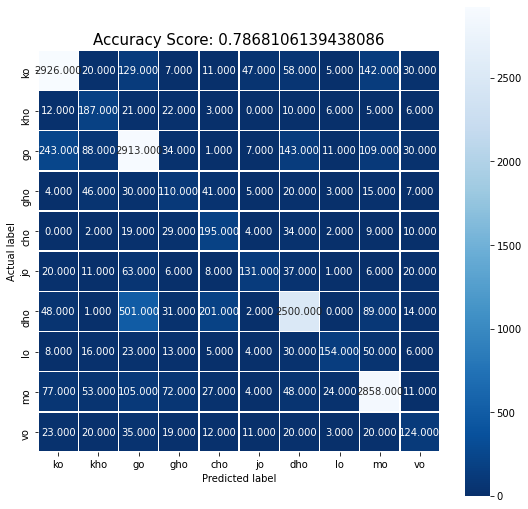

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, index=["ko", "kho", "go", "gho" , "cho", "jo" , "dho", "lo", "mo", "vo"], columns=["ko", "kho", "go", "gho" , "cho", "jo" , "dho", "lo", "mo", "vo"])
plt.figure(figsize=(9,9))
sns.heatmap(df_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
                     

# **BOTH**

In [ ]:
train_images=[]
train_labels=[]
List = os.listdir("./data/zero")
i=1

for file in List:
  file="./data/zero/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(0)
  i+=1
print(i)


List = os.listdir("./data/one")
i=1
for file in List:
  file="./data/one/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(1)
  i+=1
print(i)



List = os.listdir("./data/two")
i=1

for file in List:
  file="./data/two/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(2)
  i+=1
print(i)



List = os.listdir("./data/three")
i=1

for file in List:
  file="./data/three/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(3)
  i+=1

print(i)
len(train_images)

List = os.listdir("./data/four")
i=1

for file in List:
  file="./data/four/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(4)

  i+=1

print(i)


List = os.listdir("./data/five")
i=1

for file in List:
  file="./data/five/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(5)

  i+=1

print(i)



List = os.listdir("./data/six")
i=1
#print(len(List))
for file in List:
  file="./data/six/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(6)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)



List = os.listdir("./data/seven")
i=1
#print(len(List))
for file in List:
  file="./data/seven/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(7)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)



List = os.listdir("./data/eight")
i=1
#print(len(List))
for file in List:
  file="./data/eight/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(8)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)



List = os.listdir("./data/nine")
i=1
#print(len(List))
for file in List:
  file="./data/nine/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(9)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)


List = os.listdir("./alphabet/ko")
i=1

for file in List:
  file="./alphabet/ko/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(10)
  i+=1
print(i)


List = os.listdir("./alphabet/kho")
i=1
for file in List:
  file="./alphabet/kho/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(11)
  i+=1
print(i)



List = os.listdir("./alphabet/go")
i=1

for file in List:
  file="./alphabet/go/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(12)
  i+=1
print(i)



List = os.listdir("./alphabet/gho")
i=1

for file in List:
  file="./alphabet/gho/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(13)
  i+=1

print(i)
len(train_images)

List = os.listdir("./alphabet/cho")
i=1

for file in List:
  file="./alphabet/cho/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(14)

  i+=1

print(i)


List = os.listdir("./alphabet/jo")
i=1

for file in List:
  file="./alphabet/jo/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(15)

  i+=1

print(i)



List = os.listdir("./alphabet/dho")
i=1
#print(len(List))
for file in List:
  file="./alphabet/dho/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(16)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)



List = os.listdir("./alphabet/lo")
i=1
#print(len(List))
for file in List:
  file="./alphabet/lo/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(17)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)



List = os.listdir("./alphabet/mo")
i=1
#print(len(List))
for file in List:
  file="./alphabet/mo/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(18)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)



List = os.listdir("./alphabet/vo")
i=1
#print(len(List))
for file in List:
  file="./alphabet/vo/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(19)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)

4957
6454
6559
5977
4542
3382
3757
4129
3895
4180
22433
1959
23460
1953
1973
1967
22427
1956
22422
1966


In [ ]:
import numpy as np
print(len(train_images))
train_images=np.array(train_images)
train_labels=np.array(train_labels)
train_images = train_images / 255.0

150328


In [ ]:
print(train_images.shape)
print(train_labels.shape)

(150328, 32, 32)
(150328,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [ ]:
print(number_of_train)
print(number_of_test)

127778
22550


In [ ]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (127778, 1024)
X test flatten (22550, 1024)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()

In [ ]:

clf.fit(x_train_flatten, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
predictions = clf.predict(x_test_flatten)

In [ ]:
score = clf.score(x_test_flatten, y_test)
print(score)

0.6699334811529933


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 248   70   20  127   15   10   15    0    7    1   10    4   22   21
     1    0  119    0    8    5]
 [  11  617   49  150    3    0   10    1   49   12    2    1   10    0
     0    0   32    1    4    0]
 [   0    8  269   28    5    0   10   24   93   93   59    0  154    0
     0   35   84    4   70    0]
 [  40   43   28  388   13   88   71    4    1    2    4    1   20   26
     5    0  128    3    5    1]
 [   1    5   18   18  231    4   85    3   52    4   31    4  122    3
     2    1   53    0   12    3]
 [   2    6    0   58   18  162   69    0   50    0   21    0   97    7
     2    3   11    0    5    3]
 [   1    3   40   60    3   24  255    1  123   20   15    0   19    0
     4    1   16    1    3    5]
 [   1    2    6    7   16    3   21  253   32    2   51   10  143    0
     0   18    8    0   27    0]
 [   0    0   20    0    2   10   86    1  325   25   62    4   48    0
     0    0    0    5    2    4]
 [   1   64  105   25    0    2   44    1  107  281   1

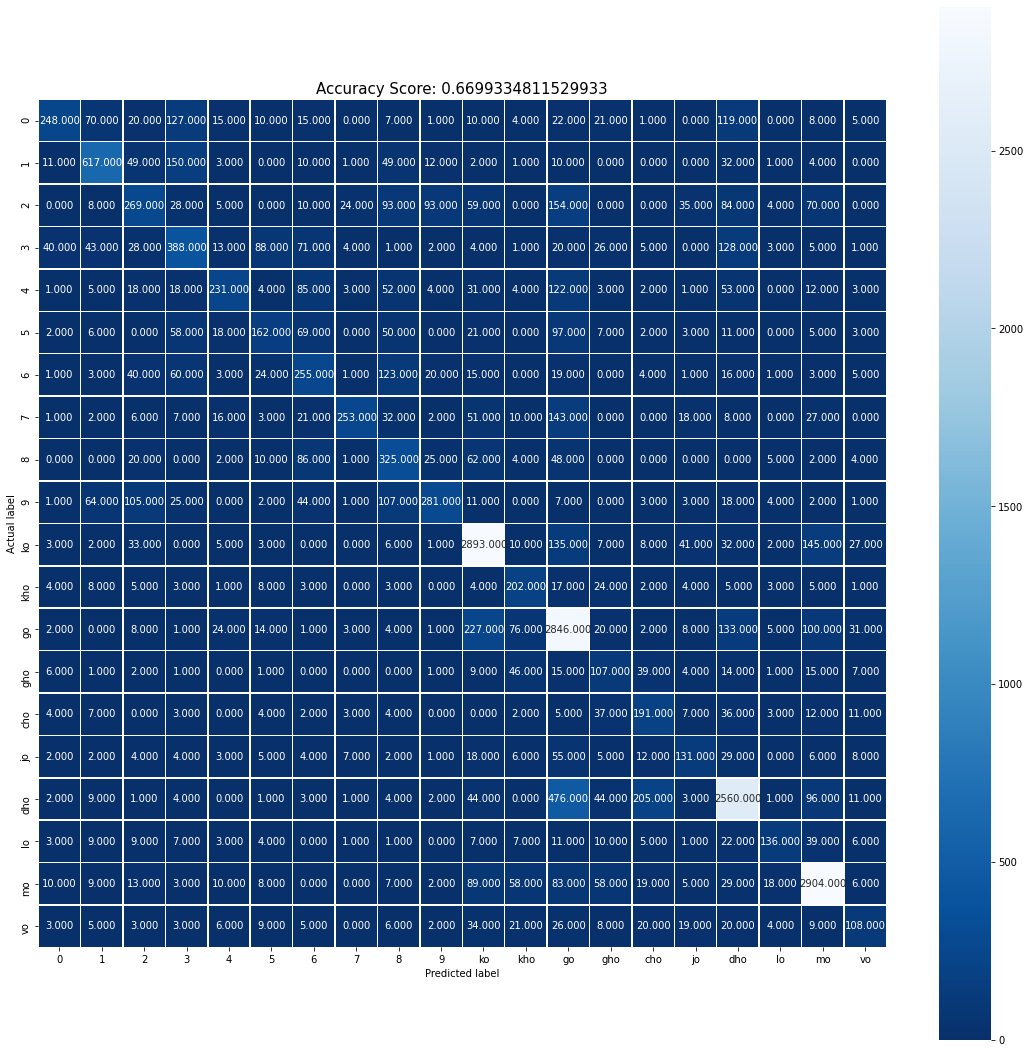

In [ ]:

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, index=["0","1","2","3","4","5","6","7","8","9","ko", "kho", "go", "gho" , "cho", "jo" , "dho", "lo", "mo", "vo"], columns=["0","1","2","3","4","5","6","7","8","9","ko", "kho", "go", "gho" , "cho", "jo" , "dho", "lo", "mo", "vo"])
plt.figure(figsize=(19,19))
sns.heatmap(df_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
                     